In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set()
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Génération des données

Pour cette fois, je vous donne beaucoup de code pour vous reposer, mais regardez bien et comprenez ce qui se passe!

In [2]:
X_blobs, y_blobs = datasets.make_blobs(n_samples=500, centers=np.array([[0,0],[5,5]]))
X_blobs = StandardScaler().fit_transform(X_blobs)

In [3]:
X_xor_blobs, y_xor_blobs = datasets.make_blobs(n_samples=1000, centers=np.array([[5,0],[5,5],[0,0],[0,5]]))
y_xor_blobs[y_xor_blobs==3] = 0
y_xor_blobs[y_xor_blobs==2] = 1
X_xor_blobs = StandardScaler().fit_transform(X_xor_blobs)

In [4]:
X_circles, y_circles = datasets.make_circles(n_samples=500, noise=.1, factor=.5)
X_circles = StandardScaler().fit_transform(X_circles)

In [5]:
X_moons, y_moons = datasets.make_moons(n_samples=500, noise=.2)
X_moons = StandardScaler().fit_transform(X_moons)

In [6]:
def make_spirals(n_samples=100, classes= 2, noise=0.0, n_loops=2):
    n_samples = n_samples // classes
    x = np.linspace(0, 1, n_samples)
    angles = np.linspace(0, 2*np.pi*n_loops, n_samples)
    init = np.linspace(0, np.pi, classes) 
    X = np.vstack([np.c_[x*np.cos(angles + start)+np.random.randn(n_samples)*noise,
                         x*np.sin(angles + start)+np.random.randn(n_samples)*noise, 
                         np.full(n_samples,label)] 
                    for label, start in enumerate(init)])
    np.random.shuffle(X)
    return X[:,:-1], X[:,-1]

In [8]:
X_spirals, y_spirals = make_spirals(n_samples=500, noise=.04)
X_spirals = StandardScaler().fit_transform(X_spirals)

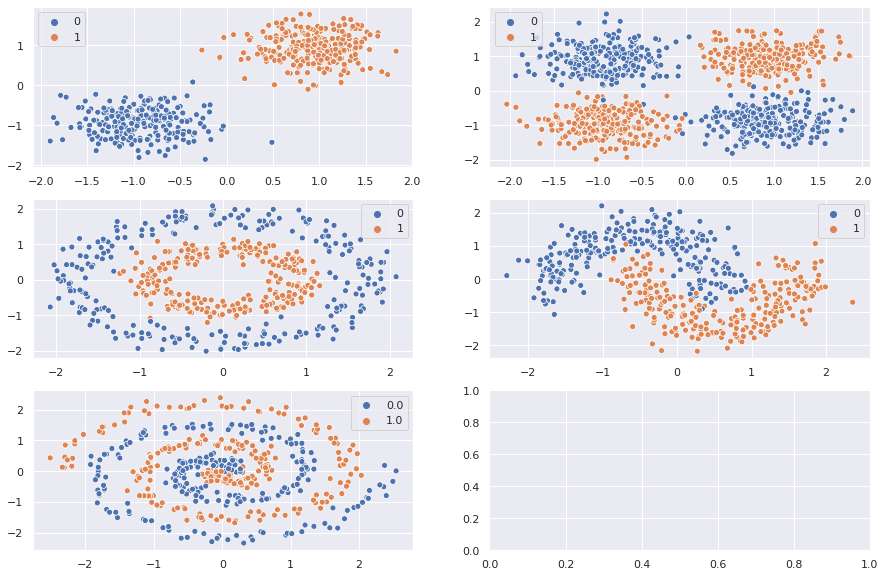

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
sns.scatterplot(x=X_blobs[:,0], y=X_blobs[:,1], hue=y_blobs, ax=ax[0,0])
sns.scatterplot(x=X_xor_blobs[:,0], y=X_xor_blobs[:,1], hue=y_xor_blobs, ax=ax[0,1])
sns.scatterplot(x=X_circles[:,0], y=X_circles[:,1], hue=y_circles, ax=ax[1,0])
sns.scatterplot(x=X_moons[:,0], y=X_moons[:,1], hue=y_moons, ax=ax[1,1])
sns.scatterplot(x=X_spirals[:,0], y=X_spirals[:,1], hue=y_spirals, ax=ax[2,0])
None

# Tracer des contours de décision

**Question** Lire la documentation de `meshgrid` et exécuter le code de l'exemple qui explique comment évaluer une fonction sur une grille

## Application 

On essaye ici sur la classif faite par un MLP.

In [11]:
X, y = X_xor_blobs, y_xor_blobs

In [12]:
step=.2
x_min, x_max = X[:, 0].min(), X[:, 0].max() + step
y_min, y_max = X[:, 1].min(), X[:, 1].max() + step
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [14]:
mlp = MLPClassifier(max_iter=5000)

In [15]:
mlp.fit(X_train, y_train).score(X_test, y_test)

MLPClassifier(max_iter=5000)

### predict_proba pour définir les contours

In [17]:
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

<AxesSubplot:>

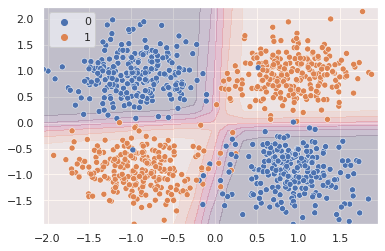

In [19]:
plt.contourf(xx, yy,  Z, alpha=.2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

### Le tout dans une petite fonction

In [20]:
def trace(X, y, clf, step=0.1):
    x_min, x_max = X[:, 0].min()-step, X[:, 0].max()+2*step
    y_min, y_max = X[:, 1].min()-step, X[:, 1].max()+2*step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf.fit(X_train, y_train)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy,  Z, alpha=.2)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
    return clf.score(X_train, y_train), clf.score(X_test, y_test)

**Question** Appliquer la fonction sur les cercles et les spirales.

# A votre tour de vous amuser et d'interpréter

**Question** Trouvez les architectures minimales de MLP qui permettent d'obtenir un taux d'erreur en test au moins de 0.8 sur les heux de données ci-dessus. On garde une relu et on ne touche qu'à `hidden_layer_sizes`. Regardez les résultats obtenus en traçant les contours de décision et concluez!

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
def my_score(X, y, size=(100,)):
    mlp.set_params(hidden_layer_sizes=size)
    return np.mean(cross_val_score(mlp, X, y))